# Data 220 Lab3
### Google Play App Analysis
Zhaohua Huang, Teng Gao

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
%matplotlib inline

googleplay = pd.read_csv('googleplaystore.csv') #import data into pandas
googleplay.head() #show how does the table look like

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Wragling the Data
We will be analyzing the 'Install and Android Version' columns. Therefore, we need to clean those unexpected entries. The 'Date' column was done at first but we did not use it for this project, just the remind me how to conver the string to datatime format.

In [2]:
googleplay.iloc[:,5]=googleplay['Installs'].map(lambda x: x.rstrip('+')).values
googleplay.iloc[:,5]=googleplay['Installs'].map(lambda x: ''.join(x.split(',')))
googleplay=googleplay.drop(googleplay.index[[10471,10472]])
#remove row 10471 due to missing value of Category
#remove row 10472 due to "Free" value in Installs
googleplay['Installs'] = pd.to_numeric(googleplay['Installs']) #change install type to numeric

googleplay['AndroidV']=googleplay['Android Ver'].str[0] #only look a the big version for this time
googleplay['AndroidV']=pd.to_numeric(googleplay['AndroidV'],errors='coerce') #change the Reviews column to float and set error exceptions

googleplay = googleplay[googleplay['Last Updated']!='1.0.19'] #there is one data record has different format, remove it for convience.
googleplay['Date'] = pd.to_datetime(googleplay['Last Updated'], format = '%B %d, %Y')

## Top 10 Installation Category
For the first part, we will analyze the top 10 categories with the highest intalltion amount. 

In [3]:
def category_install (cate):
    """
    Return a number of installation in a given catagory.
    @params cate the given category
    """
        
    category_install_list=[install for install, category in zip(googleplay['Installs'], googleplay['Category']) if (category==cate)]
    return (sum(category_install_list))

# generate category name list:
category_name_list=googleplay['Category'].unique()

def category_percentage_install(cate):
    """
    Return a percentage of intallation in a given category.
    @params cate the given category
    """
    cate_install_list=category_install(cate)
    percen=category_install(cate)/sum(googleplay['Installs'])
        
    return percen

sum_list=[]
percen_list=[]
for cate in category_name_list:
    sum_list.append(category_install(cate))
    percen_list.append(category_percentage_install(cate))
    
    print (f' Found {category_install(cate)} {cate} installs with a percentage of {100*category_percentage_install(cate):.2f}%')

#zip up three lists, sort by installations, slicing top 10
zipped=zip(category_name_list,sum_list,percen_list)
zipped=list(zipped)
res=sorted(zipped,key=lambda x: x[1],reverse=True)
top10=res[:10]

top10_category=[]
top10_percentage=[]
top10_install=[]
for i in range(10):
    top10_percentage.append(top10[i][2])
    top10_category.append(top10[i][0])
    top10_install.append(top10[i][1])
    

other_percentage=1-np.sum(top10_percentage)
other_install=np.sum(sum_list)-np.sum(top10_install)
top10_category.append('OTHERS')
top10_percentage.append(other_percentage)
top10_install.append(other_install)    

 Found 124338100 ART_AND_DESIGN installs with a percentage of 0.07%
 Found 53130211 AUTO_AND_VEHICLES installs with a percentage of 0.03%
 Found 27197050 BEAUTY installs with a percentage of 0.02%
 Found 1921469576 BOOKS_AND_REFERENCE installs with a percentage of 1.15%
 Found 1001914865 BUSINESS installs with a percentage of 0.60%
 Found 56086150 COMICS installs with a percentage of 0.03%
 Found 32647276251 COMMUNICATION installs with a percentage of 19.48%
 Found 264310807 DATING installs with a percentage of 0.16%
 Found 871452000 EDUCATION installs with a percentage of 0.52%
 Found 2869160000 ENTERTAINMENT installs with a percentage of 1.71%
 Found 15973161 EVENTS installs with a percentage of 0.01%
 Found 876648734 FINANCE installs with a percentage of 0.52%
 Found 273898751 FOOD_AND_DRINK installs with a percentage of 0.16%
 Found 1583072512 HEALTH_AND_FITNESS installs with a percentage of 0.94%
 Found 168712461 HOUSE_AND_HOME installs with a percentage of 0.10%
 Found 62995910 L

# Charts: Installtions in top 10 categories

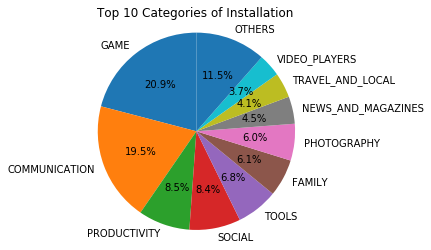

In [4]:

df_count_pie = pd.DataFrame({'Category' :top10_category, 
                             'Percentage' : top10_install})
fig1, ax1 = plt.subplots()
ax1.pie(df_count_pie.Percentage, labels=df_count_pie.Category,autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Top 10 Categories of Installation')
plt.axis('equal')
plt.show()

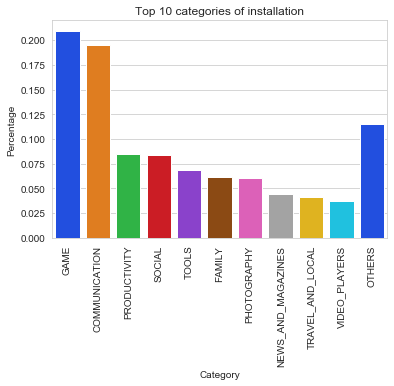

In [5]:
sns.set_style('whitegrid')  # white backround with gray grid lines
axes = sns.barplot(top10_category,top10_percentage, palette='bright')
axes.set_title('Top 10 categories of installation')
axes.set(xlabel='Category', ylabel='Percentage')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

plt.show()  # display the chart 

## Previous Part
For the previous part, we find out the top 10 installation app categories. 
This makes us to think about what is affecting the installation (popularity).
If we are builidng a new app, in order to get more popularity, what should we pay attention to?

## Next Part
Based on the data we have, we want to demonstrate one factor that may affect the installation.
We will work on the supported Android version to give a solution for Aoo develop companies to make their decisions.

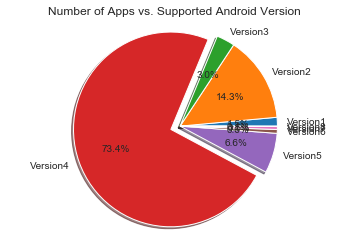

In [6]:
# this graph will be analyzing the amount of apps in different Andriod version
version_category = googleplay['AndroidV'].unique()
def app_support_version(version):
    """ 
    Return the list of apps in the given Android Version.
    @param version The supported version.
    @return the list of apps.
    """
    
    return [apps for apps, ver in zip(googleplay.App, googleplay['AndroidV']) 
                         if not math.isnan(ver) and (ver == version)]

version_count = []
version_name  = []
for i in range(1,9):
    app_v =  len(app_support_version(i))
    version_count.append(app_v)
    version_name.append(f'Version{i}')

df_count_pie = pd.DataFrame({'Version' : version_name, 
                             'Counts' : version_count})
explode = (0,0,0,0.1,0,0,0,0)
fig1 = plt.pie(df_count_pie.Counts,labels = df_count_pie.Version,autopct='%1.1f%%',startangle=0,explode = explode,shadow=True)
plt.axis('equal')
plt.title('Number of Apps vs. Supported Android Version')
plt.savefig('app_vs_version.png'); # save this graph under the same directory

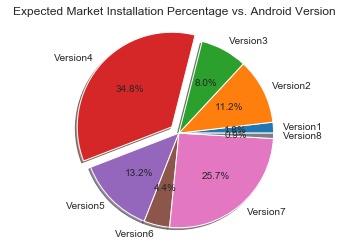

In [7]:
# this graph will be analyzing the 
def install_in_version(version):
    """ 
    Return the list of ages of passengers in a given class.
    @param klass the given class.
    @return the list of ages.
    """
    
    return [installs for installs, ver in zip(googleplay['Installs'], googleplay['AndroidV']) 
                         if not math.isnan(ver) and (ver == version)]
install_count_mean = []
for i in range(1,9):
    temp = install_in_version(i)
    app_v =  sum(temp)
    install_count_mean.append(app_v/len(temp))
# find out for each app under certain version, how much installation will be
df_count_pie = pd.DataFrame({'Version' : version_name, 
                             'Counts' : install_count_mean})
fig1 = plt.pie(df_count_pie.Counts,labels = df_count_pie.Version,autopct='%1.1f%%',startangle=0,explode = explode,shadow=True)
plt.axis('equal')
plt.title('Expected Market Installation Percentage vs. Android Version')
plt.savefig('install_vs_version.png'); # save the graph under the same directory

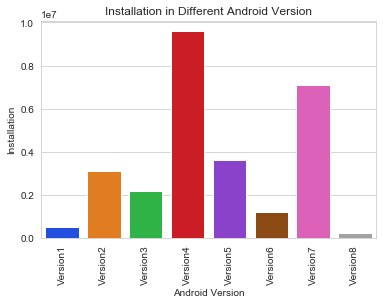

In [8]:
sns.set_style('whitegrid')  # white backround with gray grid lines
axes = sns.barplot(version_name,install_count_mean, palette='bright')
axes.set_title('Installation in Different Android Version')
axes.set(xlabel='Android Version', ylabel='Installation')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

plt.show()  # display the chart 

## This will give a basic idea that how are apps are downloaded in each version. 

#### Notice that our data's version mean version and above. This means that version 2 app can be installed in version 8 Android devices. Below we will add a chart to include all the versions for that app.

Companies can put this table and their development budget in each Android version to find out the best off.

We also need to consider that fact that the some high Android version will not support low Android version apps.
In doing analysis on development budget, companies may also consider the Android version upgrade rate and Phone layoff rate.

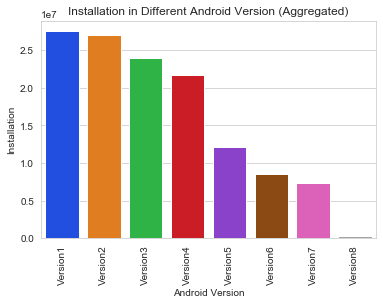

In [9]:
# Bar chart for installations including the versions above
install_version_agg=[0]*8
for i in range(0,8):
    install_version_agg[i] = sum(install_count_mean[i:])

sns.set_style('whitegrid')  # white backround with gray grid lines
axes = sns.barplot(version_name,install_version_agg, palette='bright')
axes.set_title('Installation in Different Android Version (Aggregated)')
axes.set(xlabel='Android Version', ylabel='Installation')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

plt.show()  # display the chart 

## Meansure of Central Tendency and Variability

In [10]:
googleplay.describe()

,Rating,Installs,AndroidV
count,9365.000000,1.083900e+04,9475.000000
mean,4.191831,1.546576e+07,3.736992
std,0.515197,8.503316e+07,0.898982
min,1.000000,0.000000e+00,1.000000
25%,4.000000,1.000000e+03,4.000000
50%,4.300000,1.000000e+05,4.000000
75%,4.500000,5.000000e+06,4.000000
max,5.000000,1.000000e+09,8.000000


In [11]:
print(f'Installation mean                  = {stat.mean(googleplay.Installs):.2f}')
print(f'Installation median                = {stat.median(googleplay.Installs):.2f}')
print(f'Installation variance              = {stat.pvariance(googleplay.Installs):.2f}')
print(f'Installation standard deviation    = {stat.pstdev(googleplay.Installs):.2f}')

Installation mean                  = 15465756.39
Installation median                = 100000.00
Installation variance              = 7229970518280570.00
Installation standard deviation    = 85029233.32


In [12]:
good_version = [version for version in googleplay.AndroidV if not math.isnan(version)] # there was nan value in the version, get rid of them
print(f'Android Version mean                  = {stat.mean(good_version):.2f}')
print(f'Android Version median                = {stat.median(good_version):.2f}')
print(f'Android Version variance              = {stat.pvariance(good_version):.2f}')
print(f'Android Version standard deviation    = {stat.pstdev(good_version):.2f}')
print('Android Verison 25% percentile        =',np.percentile(good_version,25))
print('Android Verison 50% percentile        =',np.percentile(good_version,50))
print('Android Verison 75% percentile        =',np.percentile(good_version,75))

Android Version mean                  = 3.74
Android Version median                = 4.00
Android Version variance              = 0.81
Android Version standard deviation    = 0.90
Android Verison 25% percentile        = 4.0
Android Verison 50% percentile        = 4.0
Android Verison 75% percentile        = 4.0


## Conclusion
The Central tendency and Variability meets what are in the description.
Android version are focused mostly on Version 4 we can also see that in the bar chart.
Because the installation are decreasingly set, we can see its standard deviation is high.

We made a graph for the relationship of Installation and Android version, hoping can help making app development decisions.